# Data Analysis

## A. Data Analysis with IMDB Movie data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = "IMDB-Movie-Data.csv"

# Read data from .csv file
data = pd.read_csv(dataset_path)
# Read data with specified explicit index .
# We will use this later in our analysis
data_indexed = pd.read_csv(dataset_path, index_col="Title")

In [2]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [5]:
genre = data["Genre"]
genre

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [6]:
data[['Genre']]

,Genre
0,"Action,Adventure,Sci-Fi"
1,"Adventure,Mystery,Sci-Fi"
2,"Horror,Thriller"
3,"Animation,Comedy,Family"
4,"Action,Adventure,Fantasy"
...,...
995,"Crime,Drama,Mystery"
996,Horror
997,"Drama,Music,Romance"
998,"Adventure,Comedy"


In [7]:
some_cols = data[["Title", "Genre", "Actors", "Director", "Rating"]]
some_cols

,Title,Genre,Actors,Director,Rating
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi","Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",James Gunn,8.1
1,Prometheus,"Adventure,Mystery,Sci-Fi","Noomi Rapace, Logan Marshall-Green, Michael Fa...",Ridley Scott,7.0
2,Split,"Horror,Thriller","James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",M. Night Shyamalan,7.3
3,Sing,"Animation,Comedy,Family","Matthew McConaughey,Reese Witherspoon, Seth Ma...",Christophe Lourdelet,7.2
4,Suicide Squad,"Action,Adventure,Fantasy","Will Smith, Jared Leto, Margot Robbie, Viola D...",David Ayer,6.2
...,...,...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery","Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",Billy Ray,6.2
996,Hostel: Part II,Horror,"Lauren German, Heather Matarazzo, Bijou Philli...",Eli Roth,5.5
997,Step Up 2: The Streets,"Drama,Music,Romance","Robert Hoffman, Briana Evigan, Cassie Ventura,...",Jon M. Chu,6.2
998,Search Party,"Adventure,Comedy","Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",Scot Armstrong,5.6


In [8]:
data.iloc[10:15][["Title", "Rating", "Revenue (Millions)"]]

,Title,Rating,Revenue (Millions)
10,Fantastic Beasts and Where to Find Them,7.5,234.02
11,Hidden Figures,7.8,169.27
12,Rogue One,7.9,532.17
13,Moana,7.7,248.75
14,Colossal,6.4,2.87


In [14]:
data[
    ((data["Year"] >= 2010) & (data["Year"] <= 2015))
    & (data["Rating"] < 6.0)
    & (data["Revenue (Millions)"] > data["Revenue (Millions)"].quantile(0.95))
]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
941,942,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",As a string of mysterious killings grips Seatt...,David Slade,"Kristen Stewart, Robert Pattinson, Taylor Laut...",2010,124,4.9,192740,300.52,58.0


In [15]:
data.groupby("Director")[["Rating"]].mean().head()

,Rating
Director,
Aamir Khan,8.5
Abdellatif Kechiche,7.8
Adam Leon,6.5
Adam McKay,7.0
Adam Shankman,6.3


In [16]:
data.groupby("Director")[["Rating"]].mean().sort_values(
    ["Rating"], ascending=False
).head()

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Florian Henckel von Donnersmarck,8.50


In [27]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [25]:
revenue_mean = data_indexed["Revenue (Millions)"].mean()
print("The mean revenue is: ", revenue_mean)
data_indexed.fillna({"Revenue (Millions)": revenue_mean}, inplace=True)

The mean revenue is:  82.95637614678898


In [29]:
def rating_group(rating):
    if rating >= 7.5:
        return "Good"
    elif rating >= 6.0:
        return "Average"
    else:
        return "Bad"

In [30]:
data["Rating_category"] = data["Rating"].apply(rating_group)

In [31]:
data[["Title", "Director", "Rating", "Rating_category"]].head(5)

,Title,Director,Rating,Rating_category
0,Guardians of the Galaxy,James Gunn,8.1,Good
1,Prometheus,Ridley Scott,7.0,Average
2,Split,M. Night Shyamalan,7.3,Average
3,Sing,Christophe Lourdelet,7.2,Average
4,Suicide Squad,David Ayer,6.2,Average


## B. Data Analysis with Time Series data

In [32]:
import pandas as pd

In [42]:
dataset_path = 'opsd_germany_daily.csv'
opsd_daily = pd.read_csv(dataset_path, index_col=0, parse_dates=True)
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [46]:
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Weekday Name"] = opsd_daily.index.day_name()
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


In [47]:
opsd_daily.loc['2014-01-20': '2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [49]:
opsd_daily.loc["2012 -02"].head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday


<Axes: xlabel='Date'>

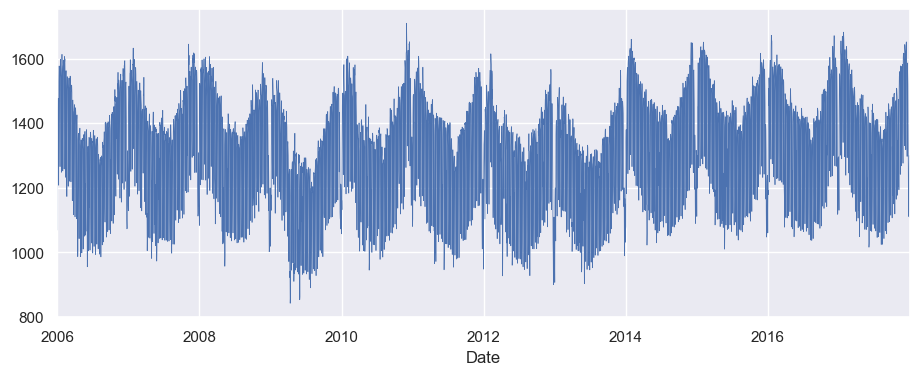

In [57]:
import matplotlib.pyplot as plt

# Display figures inline in Jupyter notebook

import seaborn as sns

# Use seaborn style defaults and set the default figure size
sns.set_theme(rc={"figure.figsize": (11, 4)})
opsd_daily["Consumption"].plot(linewidth=0.5)

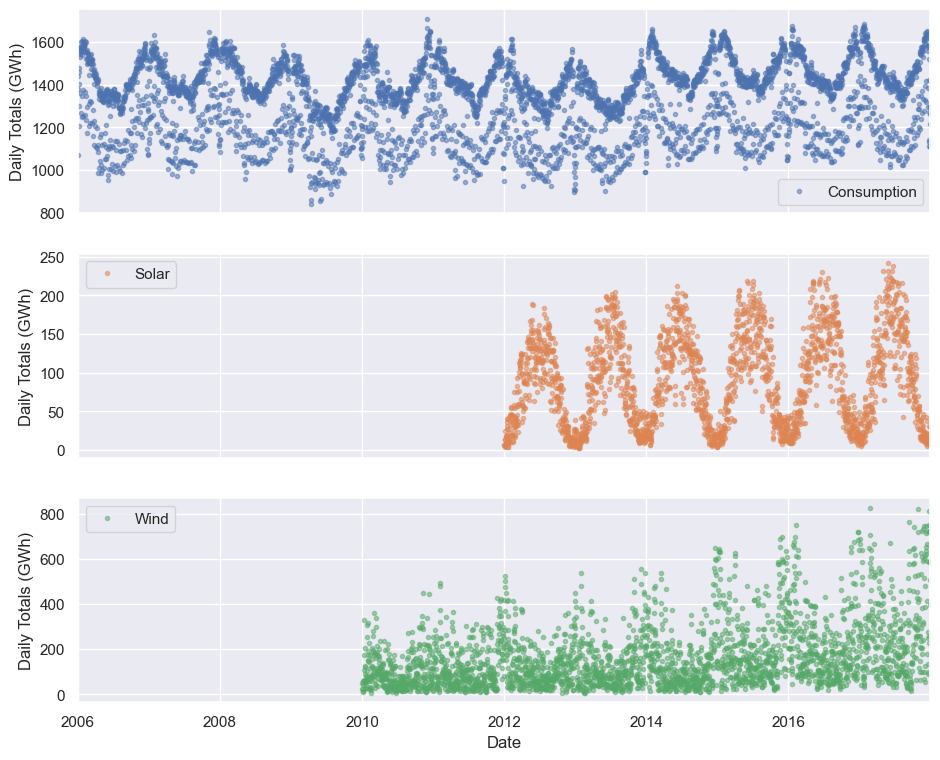

In [59]:
cols_plot = ["Consumption", "Solar", "Wind"]
axes = opsd_daily[cols_plot].plot(
    marker=".", alpha=0.5, linestyle="None", figsize=(11, 9), subplots=True
)
for ax in axes:
    ax.set_ylabel("Daily Totals (GWh)")
plt.show()

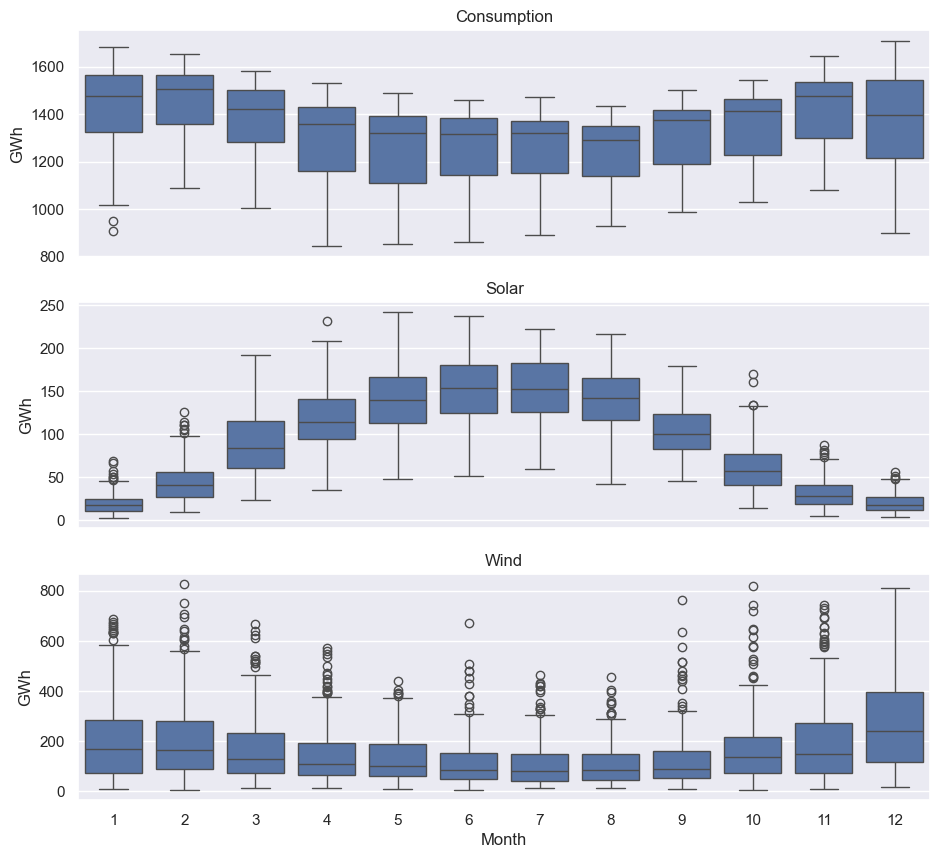

In [61]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(["Consumption", "Solar", "Wind"], axes):
    sns.boxplot(data=opsd_daily, x="Month", y=name, ax=ax)
    ax.set_ylabel("GWh")
    ax.set_title(name)
    # Remove the automatic x- axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel("")

In [63]:
pd.date_range("1998-03-10", "1998-03-15", freq="D")

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [65]:
times_sample = pd.to_datetime(["2013-02-03", "2013-02-06", "2013-02-08"])

consum_sample = opsd_daily.loc[times_sample, "Consumption"].copy()
consum_sample

2013-02-03    1109.639
2013-02-06    1451.449
2013-02-08    1433.098
Name: Consumption, dtype: float64

In [67]:
consum_freq = consum_sample.asfreq('D')
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

2013-02-03 00:00:00                                                    1109.639
2013-02-04 00:00:00                                                         NaN
2013-02-05 00:00:00                                                         NaN
2013-02-06 00:00:00                                                    1451.449
2013-02-07 00:00:00                                                         NaN
2013-02-08 00:00:00                                                    1433.098
Consumption - Forward Fill    2013-02-03    1109.639
2013-02-04    1109.639
...
Name: Consumption, dtype: object

In [69]:
data_columns = ["Consumption", "Wind", "Solar", "Wind+Solar"]
# Resample to weekly frequency , aggregating with mean
opsd_weekly_mean = opsd_daily[data_columns].resample("W").mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [70]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


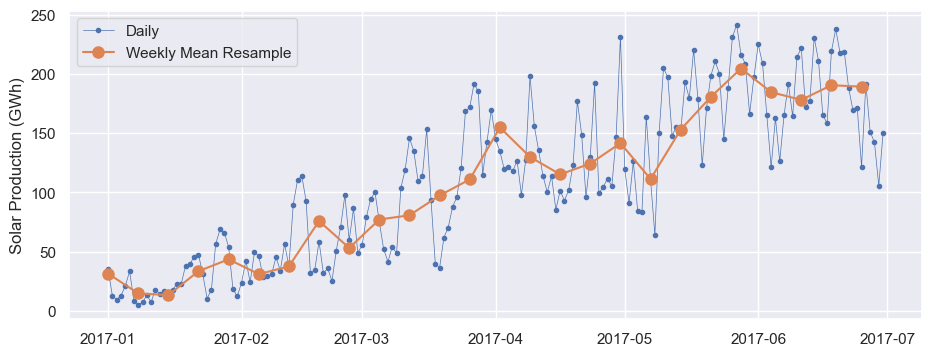

In [71]:
# Start and end of the date range to extract
start, end = "2017-01", "2017-06"
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(
    opsd_daily.loc[start:end, "Solar"],
    marker=".",
    linestyle="-",
    linewidth=0.5,
    label="Daily",
)
ax.plot(
    opsd_weekly_mean.loc[start:end, "Solar"],
    marker="o",
    markersize=8,
    linestyle="-",
    label="Weekly Mean Resample",
)
ax.set_ylabel("Solar Production (GWh)")
ax.legend()
plt.show()

In [76]:
opsd_annual = opsd_daily[data_columns].resample("YE").sum(min_count=360)

In [77]:
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = "Year"
# Compute the ratio of Wind + Solar to Consumption
opsd_annual["Wind+Solar/Consumption"] = (
    opsd_annual["Wind+Solar"] / opsd_annual["Consumption"]
)
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

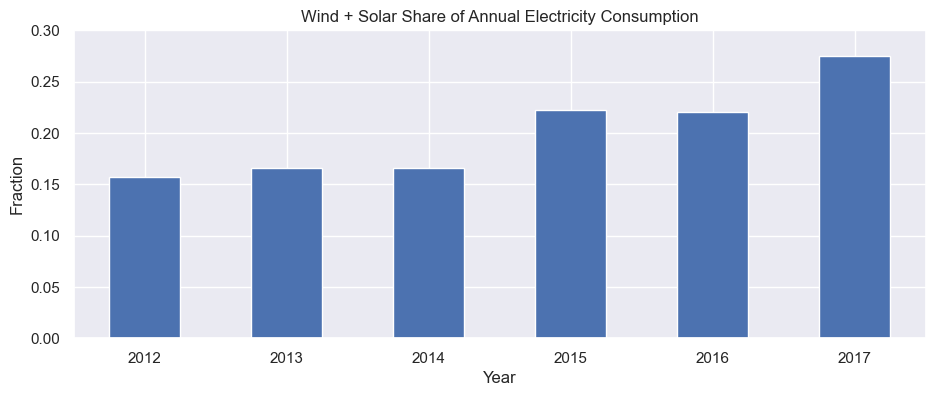

In [78]:
ax = opsd_annual.loc[2012:, "Wind+Solar/Consumption"].plot.bar(color="C0")
ax.set_ylabel("Fraction")
ax.set_ylim(0, 0.3)
ax.set_title("Wind + Solar Share of Annual Electricity Consumption")
plt.xticks(rotation=0)

In [79]:
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


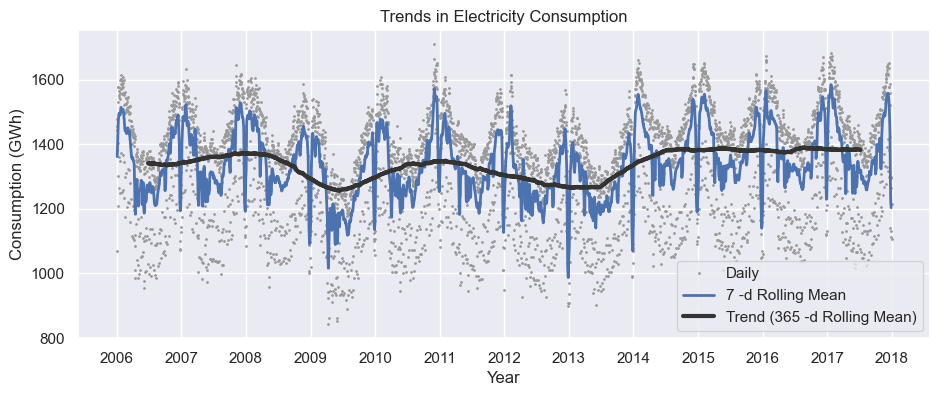

In [80]:
import matplotlib.dates as mdates

# The min_periods =360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = (
    opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()
)

# Plot daily , 7 -day rolling mean , and 365 - day rolling mean time series
fig, ax = plt.subplots()
ax.plot(
    opsd_daily["Consumption"],
    marker=".",
    markersize=2,
    color="0.6 ",
    linestyle="None",
    label="Daily",
)
ax.plot(opsd_7d["Consumption"], linewidth=2, label="7 -d Rolling Mean")
ax.plot(
    opsd_365d["Consumption"],
    color="0.2 ",
    linewidth=3,
    label="Trend (365 -d Rolling Mean)",
)
# Set x- ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Consumption (GWh)")
ax.set_title("Trends in Electricity Consumption")
plt.show()

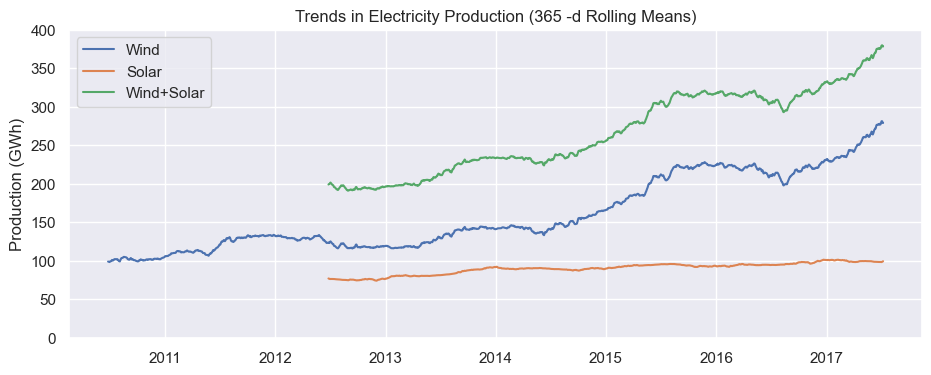

In [82]:
fig, ax = plt.subplots()
for nm in ["Wind", "Solar", "Wind+Solar"]:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x- ticks to yearly interval , adjust y- axis limits , add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel("Production (GWh)")
    ax.set_title("Trends in Electricity Production (365 -d Rolling Means)")
plt.show()